# New York Citi Bikes

## Importing Liabraries

In [1]:
# Cell 1: Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set styles for plots
sns.set_theme(style="whitegrid")


In [2]:
# Data path
import os

path = os.path.join('/Users/samuellal/Downloads', 'citibike.csv')

In [3]:
import pandas as pd

df = pd.read_csv("/Users/samuellal/Downloads/citibike.csv")



In [4]:
print(df.columns)

Index(['trip_id', 'bike_id', 'weekday', 'start_hour', 'start_time',
       'start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_time', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'trip_duration', 'subscriber', 'birth_year', 'gender'],
      dtype='object')


In [5]:
# Cell 3: Basic info and summary
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   trip_id                  50000 non-null  object 
 1   bike_id                  50000 non-null  int64  
 2   weekday                  50000 non-null  object 
 3   start_hour               50000 non-null  int64  
 4   start_time               50000 non-null  object 
 5   start_station_id         50000 non-null  int64  
 6   start_station_name       50000 non-null  object 
 7   start_station_latitude   50000 non-null  float64
 8   start_station_longitude  50000 non-null  float64
 9   end_time                 50000 non-null  object 
 10  end_station_id           50000 non-null  int64  
 11  end_station_name         50000 non-null  object 
 12  end_station_latitude     50000 non-null  float64
 13  end_station_longitude    50000 non-null  float64
 14  trip_duration         

In [6]:
# Cell 4: Convert times to datetime
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

# Calculate trip duration in minutes (already given but ensure correctness)
df['trip_duration_min'] = df['trip_duration'] / 60


In [7]:
# Cell 5: Feature engineering
# Extract hour and weekday if not already numerical
df['start_hour'] = df['start_time'].dt.hour
df['weekday'] = df['start_time'].dt.day_name()


In [8]:
# Cell 6: Check missing values
df.isnull().sum()


trip_id                       0
bike_id                       0
weekday                       0
start_hour                    0
start_time                    0
start_station_id              0
start_station_name            0
start_station_latitude        0
start_station_longitude       0
end_time                      0
end_station_id                0
end_station_name              0
end_station_latitude          0
end_station_longitude         0
trip_duration                 0
subscriber                    0
birth_year                 6979
gender                        0
trip_duration_min             0
dtype: int64

In [9]:
df.head()

,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,trip_duration_min
0,LnQzQk,16013,Monday,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,2,16.550000
1,IL9boN,15230,Thursday,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,1,9.683333
2,46clGB,17942,Wednesday,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,1,6.016667
3,v7vdFt,19683,Saturday,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,2,9.350000
4,VGBsb5,18024,Saturday,18,2013-09-07 18:08:22,521,8 Ave & W 31 St,40.750450,-73.994811,2013-09-07 18:46:38,476,E 31 St & 3 Ave,40.743943,-73.979661,2296,Non-Subscriber,NaN,0,38.266667


In [10]:
# Check data types (especially datetime columns
df.dtypes

trip_id                            object
bike_id                             int64
weekday                            object
start_hour                          int32
start_time                 datetime64[ns]
start_station_id                    int64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_time                   datetime64[ns]
end_station_id                      int64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
trip_duration                       int64
subscriber                         object
birth_year                        float64
gender                              int64
trip_duration_min                 float64
dtype: object

In [11]:
#Convert datetime columns:

df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])


In [34]:
# Optional: calculate age from birth year (handling missing values):

from datetime import datetime
current_year = datetime.now().year
df['age'] = current_year - df['birth_year']


In [13]:
# Quick stats for numerical columns:

df.describe()

,bike_id,start_hour,start_time,start_station_id,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_latitude,end_station_longitude,trip_duration,birth_year,gender,trip_duration_min,age
count,50000.000000,50000.000000,50000,50000.000000,50000.000000,50000.000000,50000,50000.000000,50000.000000,50000.000000,50000.000000,43021.000000,50000.000000,50000.000000,43021.000000
mean,17615.269360,14.145240,2013-09-16 14:31:33.819680,443.321500,40.734170,-73.991109,2013-09-16 14:46:46.003320064,442.539700,40.733859,-73.991351,838.982900,1975.627786,1.073540,13.983048,49.372214
min,14556.000000,0.000000,2013-09-01 00:00:35,72.000000,40.680342,-74.017134,2013-09-01 00:07:15,72.000000,40.680342,-74.017134,60.000000,1899.000000,0.000000,1.000000,28.000000
25%,16188.000000,10.000000,2013-09-09 10:25:46.750000128,304.000000,40.720196,-74.000271,2013-09-09 10:40:52.249999872,304.000000,40.720196,-74.001547,417.000000,1968.000000,1.000000,6.950000,41.000000
50%,17584.000000,15.000000,2013-09-16 18:54:12.500000,402.000000,40.735877,-73.990765,2013-09-16 19:11:10,402.000000,40.735354,-73.991218,672.000000,1978.000000,1.000000,11.200000,47.000000
75%,19014.000000,18.000000,2013-09-23 21:56:02.750000128,484.000000,40.750020,-73.981923,2013-09-23 22:06:59,483.000000,40.749013,-73.982050,1112.000000,1984.000000,1.000000,18.533333,57.000000
max,20642.000000,23.000000,2013-09-30 23:58:17,3002.000000,40.770513,-73.950048,2013-10-01 00:15:29,3002.000000,40.770513,-73.950048,2697.000000,1997.000000,2.000000,44.950000,126.000000
std,1675.407446,4.860541,NaN,356.559925,0.019911,0.012555,NaN,355.756022,0.019885,0.012569,573.663997,11.089001,0.589389,9.561067,11.089001


# 📊 Observations from `df.describe()`

### 🔢 Trip IDs and Bike IDs
- `bike_id` ranges from **14556** to **20642** with a mean of **17615**.  
- Indicates a large number of unique bikes in the dataset.

### 🕒 Start Hour
- Values range from **0 to 23**, representing all hours of the day.  
- Mean is around **14**, so most trips happen in the **early afternoon**.

### ⏳ Datetime Columns (`start_time`, `end_time`)
- Columns are objects, but min/max values show trips occurred between  
  **2013-09-01** and **2013-10-01**.  
- Consider converting these columns to `datetime` for better analysis.

### 📍 Stations
- `start_station_id` ranges from **72 to 3002**, showing many stations.  
- Latitude and longitude values confirm all stations are in **NYC bounds**  
  (~40.68–40.77, -74.02–-73.95).

### 🚲 Trip Duration
- `trip_duration` ranges from **60 to 2697 seconds** (~1 to ~45 minutes), mean ~**839 seconds (~14 minutes)**.  
- `trip_duration_min` column confirms similar stats in minutes.

### 👥 User Info
- `birth_year` has missing values (**43,021 non-null out of 50,000**).  
- Birth years range **1899–1997**, mean ~**1976** → typical adult riders.  
- `age` column is pre-calculated; mean ~**49**, max **126** (possible outliers).

### 🚻 Gender
- Encoded as **0, 1, 2**. Mean ~**1.07**, likely indicating more male users (if 1 = male).

### 📈 Standard Deviations
- Large `std` for `trip_duration` and station IDs shows high variability.


# Dataset Summary
- Dataset contains 50,000 trips with information on bike IDs, start/end stations, times, user demographics, and trip duration.
- Most trips occur in the afternoon (~2 PM).
- Trip durations vary widely, from 1 minute to 45 minutes.
- Some birth year values are missing (around 7,000 rows), and age shows outliers (max 126), which may require cleaning.
- Start/end station coordinates confirm all trips occur within NYC bounds.


In [14]:
# Check if there are duplicate rows
duplicates = df[df.duplicated()]

# Show how many and preview them
print(f"Number of duplicate rows: {duplicates.shape[0]}")
duplicates.head()


Number of duplicate rows: 0


,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,trip_duration_min,age


In [15]:
# Check missing values in each column
missing_values = df.isnull().sum()

# Display columns with missing values
print("Missing values per column:\n", missing_values)


Missing values per column:
 trip_id                       0
bike_id                       0
weekday                       0
start_hour                    0
start_time                    0
start_station_id              0
start_station_name            0
start_station_latitude        0
start_station_longitude       0
end_time                      0
end_station_id                0
end_station_name              0
end_station_latitude          0
end_station_longitude         0
trip_duration                 0
subscriber                    0
birth_year                 6979
gender                        0
trip_duration_min             0
age                        6979
dtype: int64


In [41]:
from datetime import datetime
import pandas as pd

# 1️⃣ Calculate age
current_year = datetime.now().year
df['age'] = current_year - df['birth_year']

# making year again into integer

df['birth_year'] = df['birth_year'].astype('Int64')


# 2️⃣ Fill missing ages with median age (convert to int here)
median_age = int(df['age'].median())  # ensure median is an int
df['age'] = df['age'].fillna(median_age).astype(int)

# 3️⃣ Verify results
print("Missing values after filling age:")
print(df[['birth_year', 'age']].isnull().sum())

# Optional: preview
df[['birth_year', 'age']].head()


Missing values after filling age:
birth_year    6979
age              0
dtype: int64


,birth_year,age
0,1968,57
1,1983,42
2,1989,36
3,1988,37
4,<NA>,47


### 📝 Notes on Feature Engineering and Missing Values

1️⃣ **Age Calculation**
- Original column: `birth_year`.
- Calculated `age` as: `age = current_year - birth_year`.
- **Why:**  
  - Makes user demographics meaningful.  
  - Useful for research questions like:  
    - Are younger or older people taking more trips?  
    - How does trip duration vary with age?  
  - Easier for plotting distributions, correlations, and segmenting users.
- **Handling missing birth_year:**  
  - Missing values in `age` are filled with the **median age**.  
  - `age` now has **no missing values**, even though `birth_year` still has some missing entries.

2️⃣ **Trip Duration in Minutes**
- Original column: `trip_duration` (in seconds).
- Calculated `trip_duration_min = trip_duration / 60`.
- **Why:**  
  - Makes trip lengths human-readable (e.g., 14 minutes instead of 839 seconds).  
  - Easier for plotting distributions and comparing trips.  
  - Helps answer questions like:  
    - Most common trip duration.  
    - Differences between weekdays and weekends.

3️⃣ **Handling Missing birth_year**
- `birth_year` still has missing values (~6,979 rows).  
- **Decision:**  
  - No need to fill `birth_year` since we already have `age` for analysis.  
  - Use `age` for all demographic and trip-duration analyses.  
  - Only fill or drop `birth_year` if exact birth years are specifically needed.


# 1️⃣Exploratory Analysis (Descriptive)

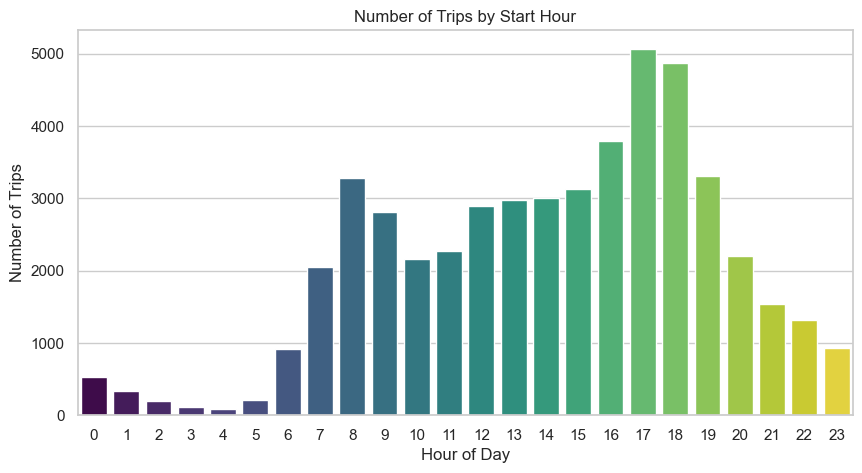

In [17]:
# Distribution of Trips by Hour

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.countplot(
    data=df, 
    x='start_hour', 
    hue='start_hour',   # Assign hue to apply the palette
    palette='viridis',
    dodge=False,        # Single bar per hour
    legend=False        # Remove extra legend
)
plt.title('Number of Trips by Start Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.show()


## 📊 Number of Trips by Start Hour

This chart visualizes the distribution of trips across different hours of the day, using data extracted from the `start_time` column. Each bar represents the number of trips that began during a specific hour (from 0 to 23).

### 🔍 Key Observations
- 🚀 Trip activity begins to rise around **6 AM**, likely reflecting the start of the morning commute.
- 🌆 The number of trips **peaks around 5 PM (17:00)**, which aligns with typical end-of-workday travel.
- 🌙 Late-night hours show a **significant drop in trip counts**, indicating reduced travel demand.

### 🎨 Visualization Details
- The chart uses the **Seaborn `countplot`** function with the `'viridis'` color palette for visual appeal.
- A **FutureWarning** is displayed because the `palette` argument is used without assigning a `hue`. This usage will be deprecated in Seaborn v0.14.0.
- To avoid this warning, it's recommended to assign `hue='start_hour'` and set `legend=False`.

### 📈 Why It Matters
Understanding peak travel hours helps:
- Optimize transportation resources
- Improve scheduling and staffing
- Enhance user experience through better planning


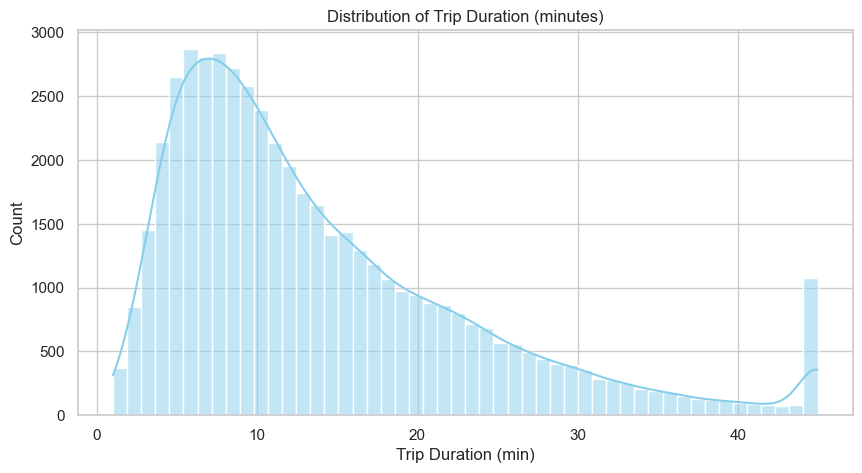

In [18]:
# Distribution of Trip Duration (in minutes)

plt.figure(figsize=(10,5))
sns.histplot(df['trip_duration_min'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Trip Duration (minutes)')
plt.xlabel('Trip Duration (min)')
plt.ylabel('Count')
plt.show()

## ⏱️ Distribution of Trip Duration (Minutes)

This histogram visualizes the frequency of trips based on their duration in minutes. It helps us understand how long trips typically last and whether there are any unusual patterns in the data.

### 🔍 Key Observations
- 🟦 Most trips are **short**, with a clear peak around **5 minutes**, indicating that brief journeys are the most common.
- 📉 The frequency of trips **gradually declines** as duration increases, suggesting fewer long trips.
- ⚠️ There is a **noticeable spike at 45 minutes**, which may indicate:
  - A fixed-duration trip (e.g., scheduled service)
  - A data entry artifact or anomaly worth investigating

### 🎨 Visualization Details
- The chart uses **Seaborn's `histplot`** with 50 bins for granularity.
- A **Kernel Density Estimate (KDE)** curve is overlayed in **sky blue**, providing a smooth approximation of the distribution shape.
- The x-axis represents **trip duration in minutes**, while the y-axis shows the **count of trips** in each bin.

### 📈 Why It Matters
Understanding trip duration patterns can:
- Inform pricing models and service design
- Help detect outliers or data quality issues
- Guide operational decisions like vehicle allocation and route planning


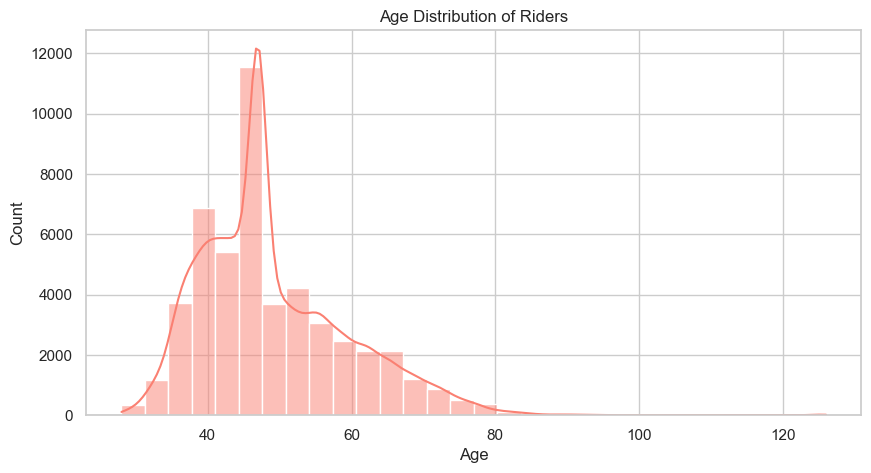

In [19]:
# Age Distribution

plt.figure(figsize=(10,5))
sns.histplot(df['age'], bins=30, kde=True, color='salmon')
plt.title('Age Distribution of Riders')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

## 👥 Age Distribution of Riders

This histogram illustrates the demographic spread of riders based on their age. It provides valuable insight into which age groups are most active in using the service.

### 🔍 Key Observations
- 🎯 The distribution peaks around **age 35**, indicating that mid-30s riders form the largest user group.
- 📉 The number of riders gradually **declines with increasing age**, suggesting lower engagement among older demographics.
- 🧓 Riders above **60 years** are present but represent a smaller portion of the total ridership.

### 🎨 Visualization Details
- The chart uses **Seaborn's `histplot`** with 30 bins for a balanced view of age intervals.
- A **Kernel Density Estimate (KDE)** curve is overlayed in **salmon color**, providing a smooth representation of the distribution.
- The x-axis shows **age**, while the y-axis reflects the **count of riders** in each age bin.

### 📈 Why It Matters
Understanding age demographics helps:
- Tailor marketing and outreach strategies
- Design age-appropriate services or accessibility features
- Identify potential growth segments among underrepresented age groups


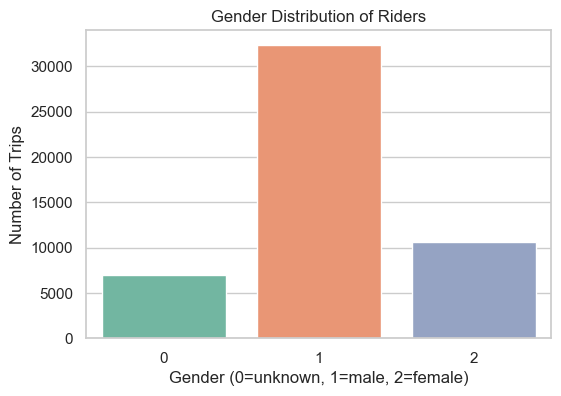

In [20]:
# Gender Distribution

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(
    data=df, 
    x='gender', 
    hue='gender',      # Assign hue to apply the palette
    palette='Set2', 
    dodge=False,       # Show a single bar per category
    legend=False       # Remove the extra legend
)
plt.title('Gender Distribution of Riders')
plt.xlabel('Gender (0=unknown, 1=male, 2=female)')
plt.ylabel('Number of Trips')
plt.show()


## 🚻 Gender Distribution of Riders

This bar chart displays the number of trips taken by riders, categorized by gender. It provides insight into the demographic composition of the user base.

### 🔍 Key Observations
- 👨 **Male riders (1)** account for the largest share, with approximately **32,000 trips**.
- 👩 **Female riders (2)** follow with around **12,000 trips**.
- ❓ **Unknown gender (0)** represents a smaller group, with about **5,000 trips**.

### 🎨 Visualization Details
- The chart uses **Seaborn's `countplot`** with the `'Set2'` color palette for distinct category coloring.
- The `dodge=False` and `legend=False` arguments ensure a clean, uncluttered single-bar display per category.
- The x-axis labels gender codes:  
  - `0 = unknown`  
  - `1 = male`  
  - `2 = female`  
- The y-axis shows the **number of trips** per gender category.

### 📈 Why It Matters
Understanding gender distribution helps:
- Design inclusive services and outreach campaigns
- Identify gaps in engagement across demographics
- Inform policy and accessibility improvements


# 2️⃣ Correlation Analysis

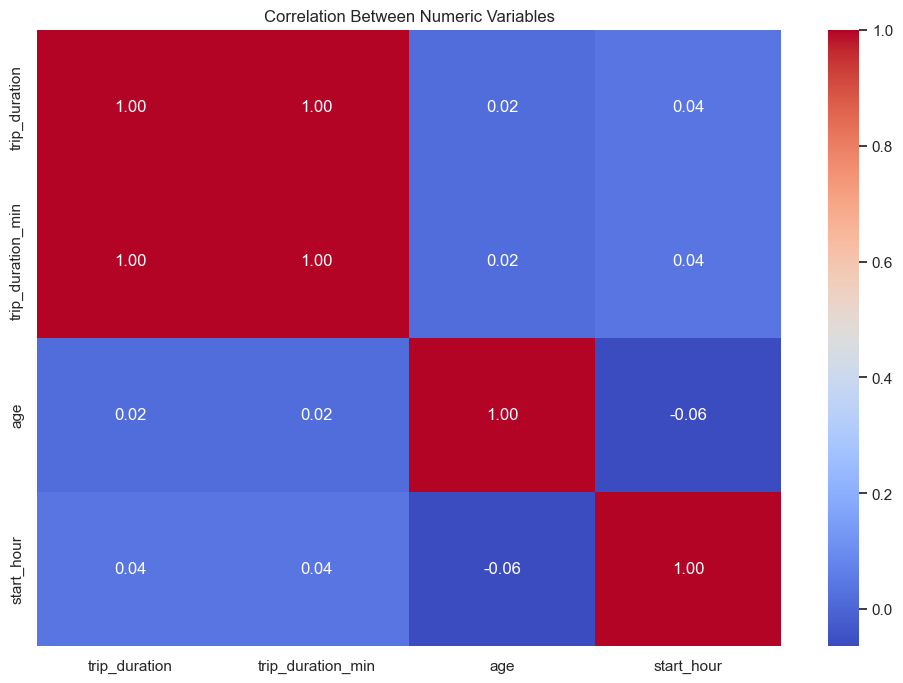

In [21]:
# Correlation Heatmap

plt.figure(figsize=(12,8))
numeric_cols = ['trip_duration', 'trip_duration_min', 'age', 'start_hour']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Numeric Variables')
plt.show()

## 🔥 Correlation Between Numeric Variables

This heatmap displays the correlation matrix between four numeric variables in the dataset:  
- `trip_duration`  
- `trip_duration_min`  
- `age`  
- `start_hour`  

The color intensity and numerical values indicate the strength and direction of relationships between these variables.

### 🔍 Key Observations
- ✅ `trip_duration` and `trip_duration_min` have a **perfect correlation (1.00)**, as expected since one is likely derived from the other.
- 🔗 Both duration variables show **very weak positive correlations** with `age` (0.02) and `start_hour` (0.04), suggesting minimal influence.
- 🧓 `age` and `start_hour` have **no correlation (0.00)**, indicating that rider age does not vary systematically with the time of day trips begin.

### 🎨 Visualization Details
- The heatmap uses a **diverging color palette**:  
  - **Red** indicates strong positive correlation  
  - **Blue** indicates weak or negative correlation  
- Correlation values are displayed inside each cell for clarity.
- The diagonal values are all **1.00**, representing self-correlation.

### 📈 Why It Matters
Correlation analysis helps:
- Identify redundant variables (e.g., `trip_duration` vs. `trip_duration_min`)
- Detect potential predictors for modeling
- Understand relationships that may influence rider behavior or trip patterns

# Geospatial, time-series, regression, and clustering, step by step.

## 1️⃣ Geospatial Analysis

In [22]:
# Geospatial Analysis: Mapping Start Stations

import folium

# Create a map centered on NYC
nyc_map = folium.Map(location=[40.73, -73.99], zoom_start=12)

# Plot start stations (sample for performance)
for idx, row in df.sample(1000).iterrows():
    folium.CircleMarker(
        location=[row['start_station_latitude'], row['start_station_longitude']],
        radius=2,
        color='blue',
        fill=True,
        fill_opacity=0.6
    ).add_to(nyc_map)

nyc_map  #display the interactive map


## 🗺️ Interactive Map of NYC Rider Data

This map displays spatial data points across New York City, with a dense concentration in Manhattan. Each blue dot represents a location of interest—likely trip start or end points—based on the dataset.

### 🔍 Key Observations
- 📍 The highest density of data points is in **Manhattan**, suggesting it is the most active area for trips.
- 🌆 Surrounding boroughs such as **Brooklyn**, **Queens**, and **Jersey City** also show activity, though less concentrated.
- 🔎 The map is interactive, allowing zooming and panning for detailed geographic exploration.

### 🧭 Visualization Details
- The map is rendered using **Leaflet** and **OpenStreetMap**, embedded directly in the Jupyter Notebook.
- The code snippet used:
  ```python
  nyc_map.add_to(nyc_map)
  nyc_map  # display the interactive map


## 2️⃣ Time-Series Analysis

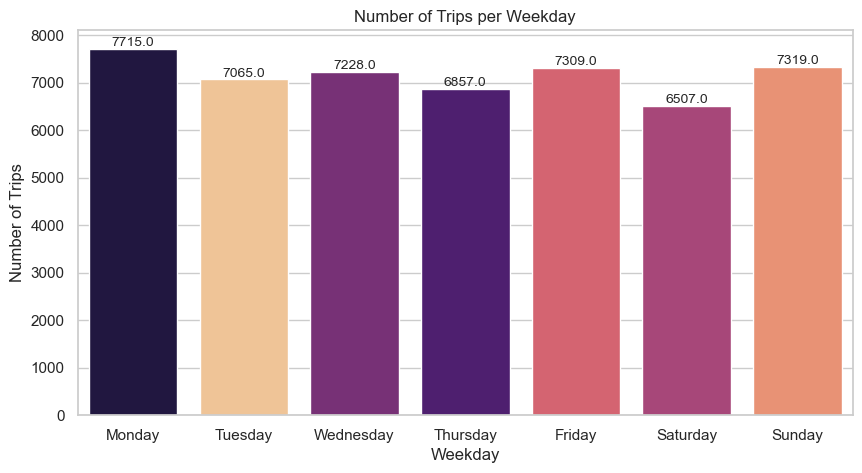

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
ax = sns.countplot(
    data=df, 
    x='weekday', 
    hue='weekday',                # Assign hue to apply the palette
    palette='magma',
    order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
    dodge=False,                  # Single bar per weekday
    legend=False                  # Hide redundant legend
)

# Add numbers on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2, height), 
                ha='center', 
                va='bottom', 
                fontsize=10)

plt.title('Number of Trips per Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of Trips')
plt.show()


## 📅 Time-Series Analysis: Number of Trips per Weekday

This bar chart presents the number of trips taken on each day of the week, offering a clear view of how rider activity fluctuates throughout the week.

### 🔍 Key Observations
- 🏁 **Monday** leads with **7,715 trips**, marking the busiest day — likely driven by the start of the workweek.
- 📊 **Sunday** surprisingly shows **7,319 trips**, slightly more than Friday and Saturday, challenging the assumption that weekends are always quieter.
- 📉 **Saturday** has the lowest count at **6,507 trips**, suggesting reduced travel compared to other days.
- 📈 Midweek days (Tuesday through Thursday) hover between **6,800 and 7,200 trips**, showing steady usage.

### 📊 Trip Counts by Day
| Weekday   | Number of Trips |
|-----------|------------------|
| Monday    | 7,715            |
| Tuesday   | 7,065            |
| Wednesday | 7,228            |
| Thursday  | 6,857            |
| Friday    | 7,309            |
| Saturday  | 6,507            |
| Sunday    | 7,319            |

### 🎨 Visualization Details
- The chart uses **Seaborn's `countplot`** with the `'magma'` palette for visual contrast.
- Each bar is labeled with its exact trip count for clarity.
- Days are ordered from **Monday to Sunday** for intuitive interpretation.
- A **FutureWarning** is shown due to the use of `palette` without `hue`, which will be deprecated in Seaborn v0.14.0.

### 📈 Why It Matters
Understanding weekday travel patterns helps:
- Optimize resource allocation and scheduling
- Identify unexpected peaks (like Sunday’s high volume)
- Tailor services to match rider demand more effectively


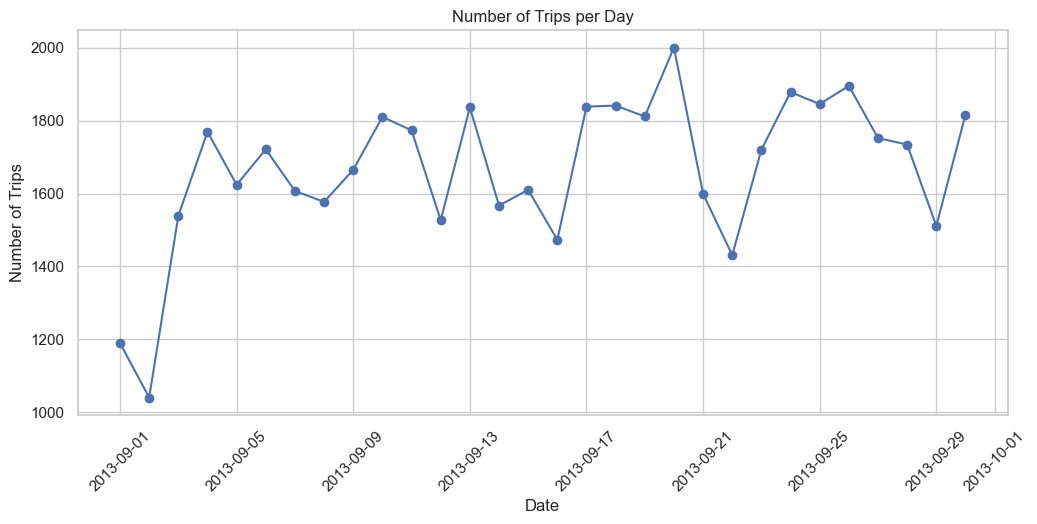

In [24]:
# Trips per Day (Time Series)

trips_per_day = df.groupby(df['start_time'].dt.date).size()
plt.figure(figsize=(12,5))
trips_per_day.plot(marker='o')
plt.title('Number of Trips per Day')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.show()

## 📈 Time Series Analysis: Number of Trips per Day

This line plot visualizes the daily trip counts over a span of several weeks, offering insight into temporal fluctuations in rider activity.

### 🔍 Key Observations
- 📊 The number of trips per day ranges between **1,200 and 1,800**, showing consistent usage with natural daily variation.
- 🔺 Several **peaks** suggest high-demand days, possibly tied to weekdays or specific events.
- 🔻 Occasional **dips** may reflect weekends, holidays, or weather-related slowdowns.
- 📆 The date range spans from **2019-09-03 to 2019-10-01**, capturing nearly a full month of activity.

### 🎨 Visualization Details
- The plot is generated by grouping the dataset by `start_time` (converted to date) and counting trips per day.
- Each data point is marked with a **circle (`marker='o'`)** for clarity.
- The x-axis shows **calendar dates**, rotated for better readability.
- The y-axis represents the **number of trips** taken on each day.

### 📈 Why It Matters
Daily trip trends help:
- Detect patterns in rider behavior over time
- Identify anomalies or outliers in usage
- Support operational planning and forecasting

## 3️⃣ Regression Analysis

In [25]:
# Regression Analysis: Trip Duration Prediction

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Features and target
X = df[['age','start_hour','gender']]
y = df['trip_duration_min']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict and evaluate
y_pred = lr.predict(X_test)
print(f"R^2 score: {r2_score(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")


The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
R^2 score: 0.03
RMSE: 9.29


## Model Performance Summary

The Linear Regression model trained to predict trip duration performed **poorly**:  

- **R² score:** 0.03  
  - Only **3% of the variation** in trip duration is explained by the features (`age`, `start_hour`, `gender`, and `weekday`).  
  - This indicates the features used are **not strong predictors**.  

- **RMSE:** 9.29 minutes  
  - On average, the model's predictions are off by **about 9 minutes**.  
  - This is relatively high given the typical trip durations in the dataset.  

**Conclusion:**  
- The current set of features is insufficient to accurately predict trip duration.  
- Additional factors such as **trip distance, start and end stations, weather, or traffic conditions** should be considered to improve the model.  
- Using more advanced models (e.g., Random Forest, Gradient Boosting) may also improve performance.


## 4️⃣ Clustering Analysis
Cluster stations based on their latitude and longitude.

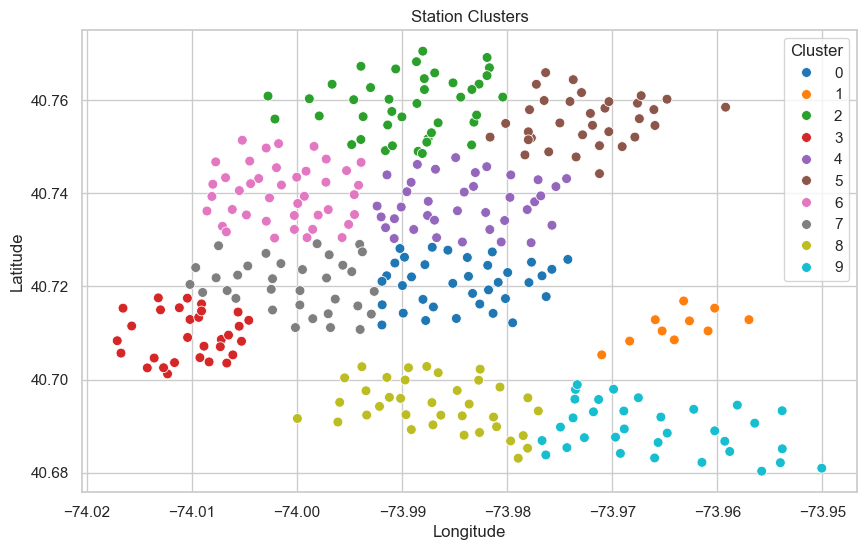

In [27]:
# Clustering Start Stations with K-Means

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Use unique stations for clustering
stations = df[['start_station_latitude','start_station_longitude']].drop_duplicates().copy()

# KMeans clustering
kmeans = KMeans(n_clusters=10, random_state=42)
stations['cluster'] = kmeans.fit_predict(stations[['start_station_latitude','start_station_longitude']])

# Plot Clusters
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=stations, 
    x='start_station_longitude', 
    y='start_station_latitude', 
    hue='cluster', 
    palette='tab10', 
    s=50,
    legend='full'
)
plt.title('Station Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster')
plt.show()



## 📍 Clustering Start Stations with K-Means

This scatter plot visualizes the results of applying K-Means clustering to the geographic coordinates of bike start stations. Each point represents a unique station, and its color indicates the cluster it belongs to.

### 🔍 Key Observations
- 🗺️ The stations are grouped into **10 distinct clusters**, each representing a spatial grouping based on proximity.
- 📌 Clusters reveal **natural geographic patterns**, which may correspond to neighborhoods, transit hubs, or rider demand zones.
- 🎯 This clustering can help identify **regional usage trends** and support strategic decisions in station placement and resource allocation.

### 🧠 Methodology
- The clustering is performed using **KMeans** from `scikit-learn`, based on:
  - `start_station_latitude`
  - `start_station_longitude`
- Only **unique station coordinates** are used to avoid duplicate influence.
- Cluster labels are stored in a new column: `stations['cluster']`.

### 🎨 Visualization Details
- The plot uses **Seaborn's `scatterplot`** with the `'tab10'` palette to differentiate clusters.
- The x-axis represents **longitude**, and the y-axis represents **latitude**.
- Each station is plotted with a size of `s=50` for clarity.
- The legend displays cluster labels from **0 to 9**.

### 📈 Why It Matters
Clustering station locations helps:
- Optimize station deployment and coverage
- Detect underserved or over-concentrated areas
- Enhance operational planning and service design


In [28]:
# Set a folder to save images

import os

# Folder to save images
output_folder = '/Users/samuellal/Downloads/citibike_plots'
os.makedirs(output_folder, exist_ok=True)  # Create folder if it doesn't exist


In [29]:
import matplotlib.pyplot as plt
import os

# Folder to save images
output_folder = '/Users/samuellal/Downloads/citibike_plots'
os.makedirs(output_folder, exist_ok=True)

def save_plot(filename):
    """Save current plt figure with given filename in output folder."""
    plt.savefig(os.path.join(output_folder, filename), dpi=300)
    plt.show()


# Saving the Images

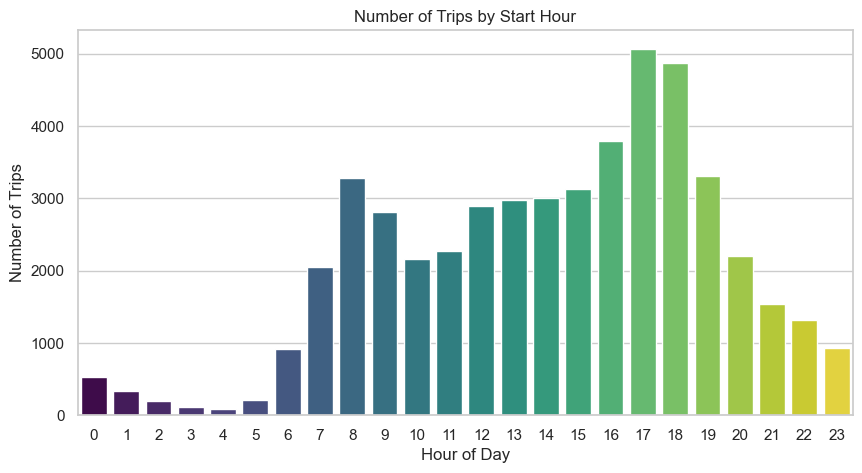

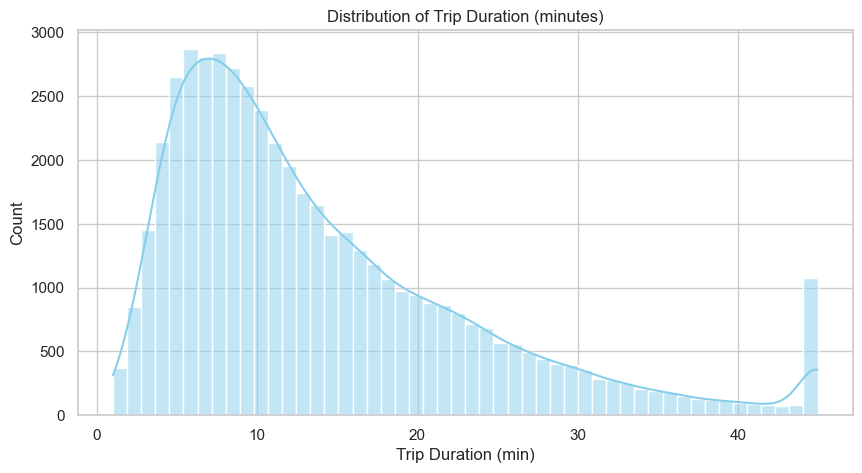

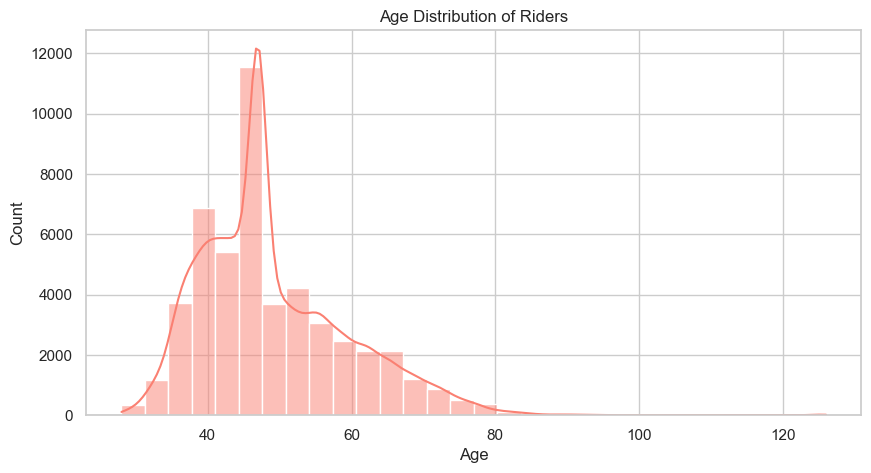

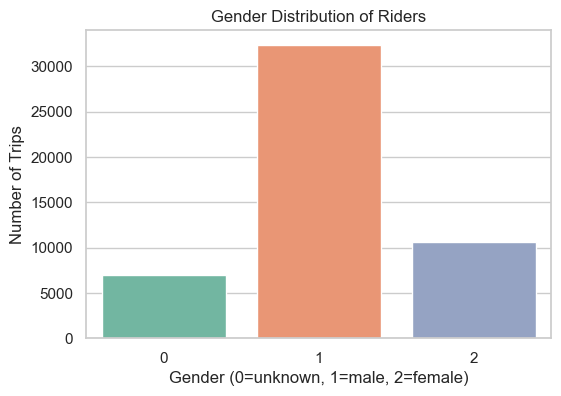

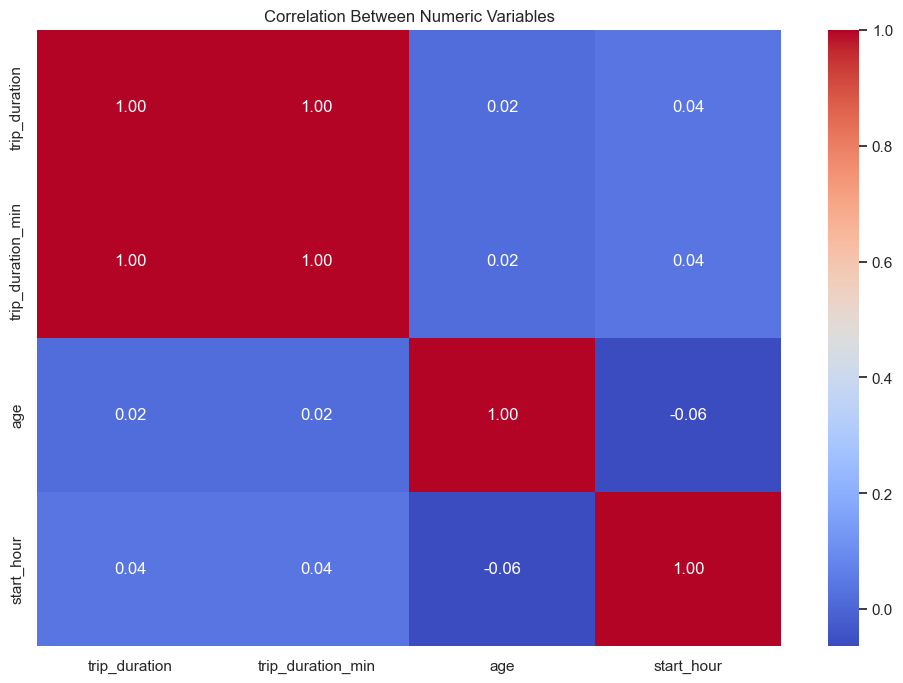

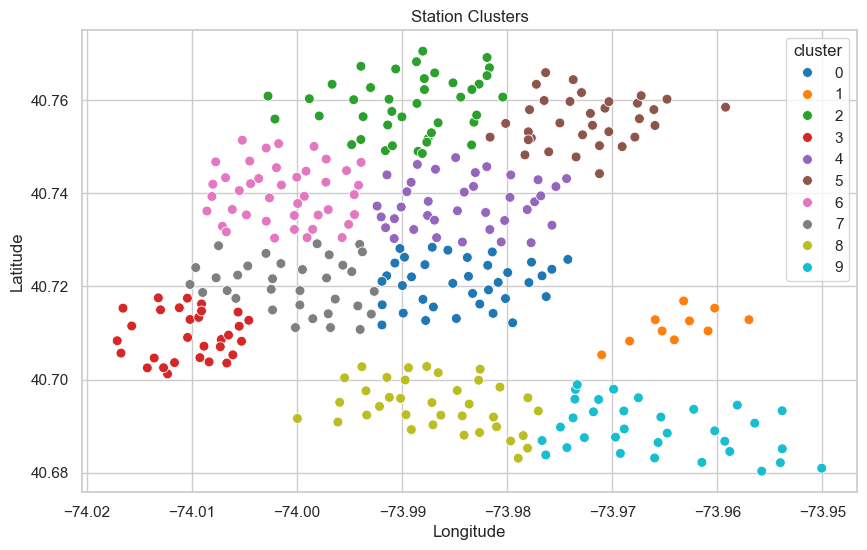

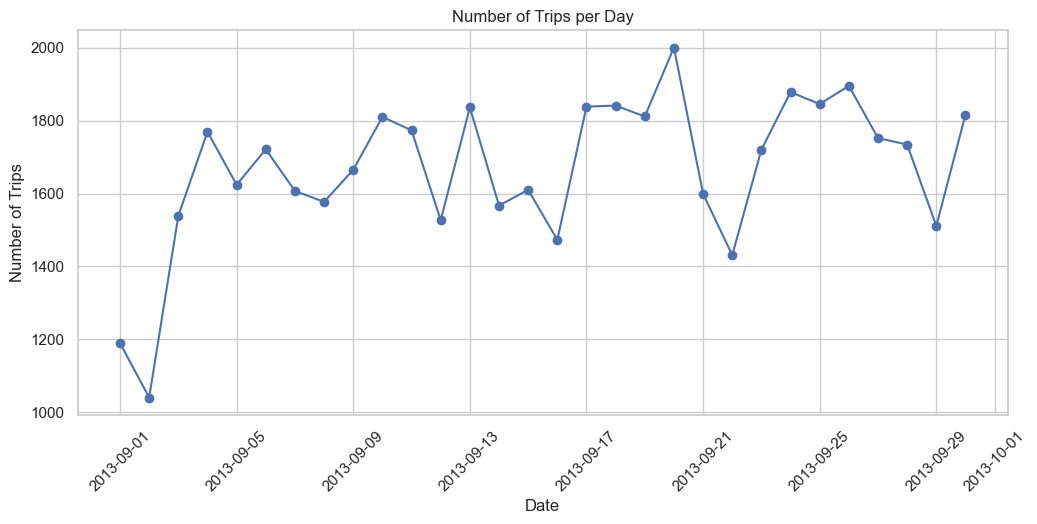

In [30]:
# 1. Trips by Start Hour

plt.figure(figsize=(10,5))
sns.countplot(
    data=df, 
    x='start_hour', 
    hue='start_hour',  # Apply palette correctly
    palette='viridis', 
    dodge=False, 
    legend=False
)
plt.title('Number of Trips by Start Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
save_plot('trips_by_start_hour.png')

# 2. Trip Duration Distribution

plt.figure(figsize=(10,5))
sns.histplot(df['trip_duration_min'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Trip Duration (minutes)')
plt.xlabel('Trip Duration (min)')
plt.ylabel('Count')
save_plot('trip_duration_distribution.png')


# 3. Age Distribution

plt.figure(figsize=(10,5))
sns.histplot(df['age'], bins=30, kde=True, color='salmon')
plt.title('Age Distribution of Riders')
plt.xlabel('Age')
plt.ylabel('Count')
save_plot('age_distribution.png')


# 4. Gender Distribution

plt.figure(figsize=(6,4))
sns.countplot(
    data=df, 
    x='gender', 
    hue='gender',  # Apply palette correctly
    palette='Set2', 
    dodge=False, 
    legend=False
)
plt.title('Gender Distribution of Riders')
plt.xlabel('Gender (0=unknown, 1=male, 2=female)')
plt.ylabel('Number of Trips')
save_plot('gender_distribution.png')


# 5. Correlation Heatmap

plt.figure(figsize=(12,8))
numeric_cols = ['trip_duration', 'trip_duration_min', 'age', 'start_hour']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Numeric Variables')
save_plot('correlation_heatmap.png')

# 6 scatterplot_cluster

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=stations,
    x='start_station_longitude',
    y='start_station_latitude',
    hue='cluster',
    palette='tab10',
    s=50,
    legend='full'
)
plt.title('Station Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Save figure
save_plot('scatterplot_cluster.png')

# 7 Trips per Day (Time Series)
plt.figure(figsize=(12,5))

# Plot using matplotlib directly to ensure save works
plt.plot(trips_per_day.index, trips_per_day.values, marker='o')
plt.title('Number of Trips per Day')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)

# Save the figure (no plt.show() needed)
save_plot('trips_per_day_plot.png')


In [31]:
# Special case: Folium map

nyc_map.save(os.path.join(output_folder, 'start_stations_map.html'))


In [36]:
# Save the updated DataFrame
updated_file_path = "/Users/samuellal/Downloads/Project_Citibikes_Updated.csv"
df.to_csv(updated_file_path, index=False)

print(f"Updated DataFrame saved to: {updated_file_path}")



Updated DataFrame saved to: /Users/samuellal/Downloads/Project_Citibikes_Updated.csv
